In [23]:
import glob
from plot_function import *
from skimage.transform import probabilistic_hough_line
from skimage import io, exposure, filters, morphology
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.feature import canny
from skimage.feature import hessian_matrix, hessian_matrix_eigvals

plt.rcParams['figure.dpi'] = 300

# open all images

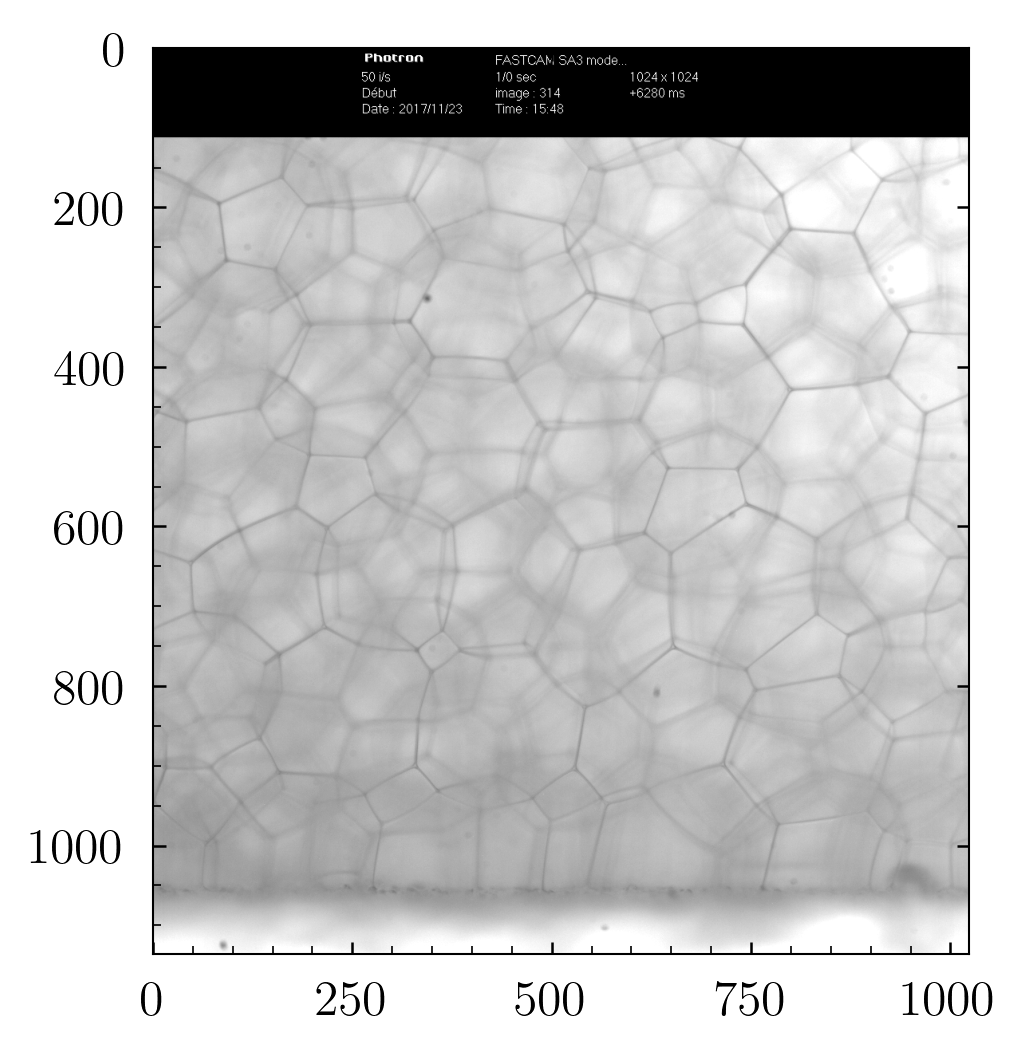

In [12]:
list_path_to_images = glob.glob('Lam1*.png')

list_images = []

for path in list_path_to_images : 
    list_images += [io.imread(path)]

plt.imshow(list_images[150], cmap='gray')

# apply the crop 

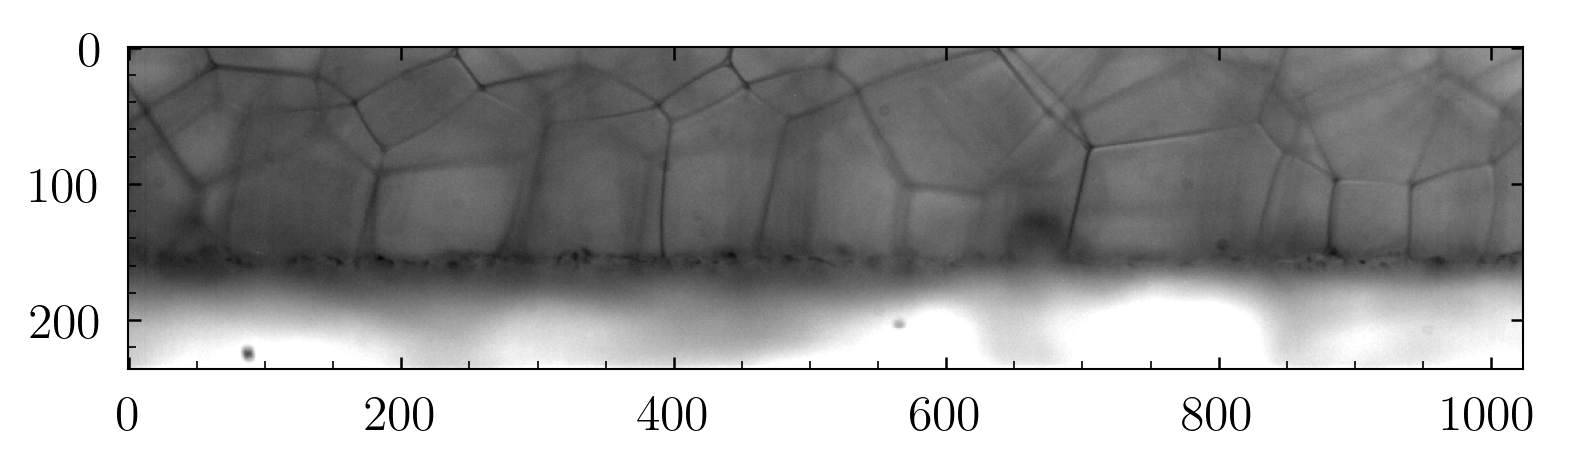

In [13]:
cropped_images = []

for img in list_images:
    cropped_images += [img[900:, :]]
    
plt.imshow(cropped_images[250], cmap='gray')

# scale white and black

In [19]:
scaled_img = []

for img in cropped_images:
    percentiles = np.percentile(img, (0.1, 70))
    scaled_img += [exposure.rescale_intensity(img, in_range=tuple(percentiles))]

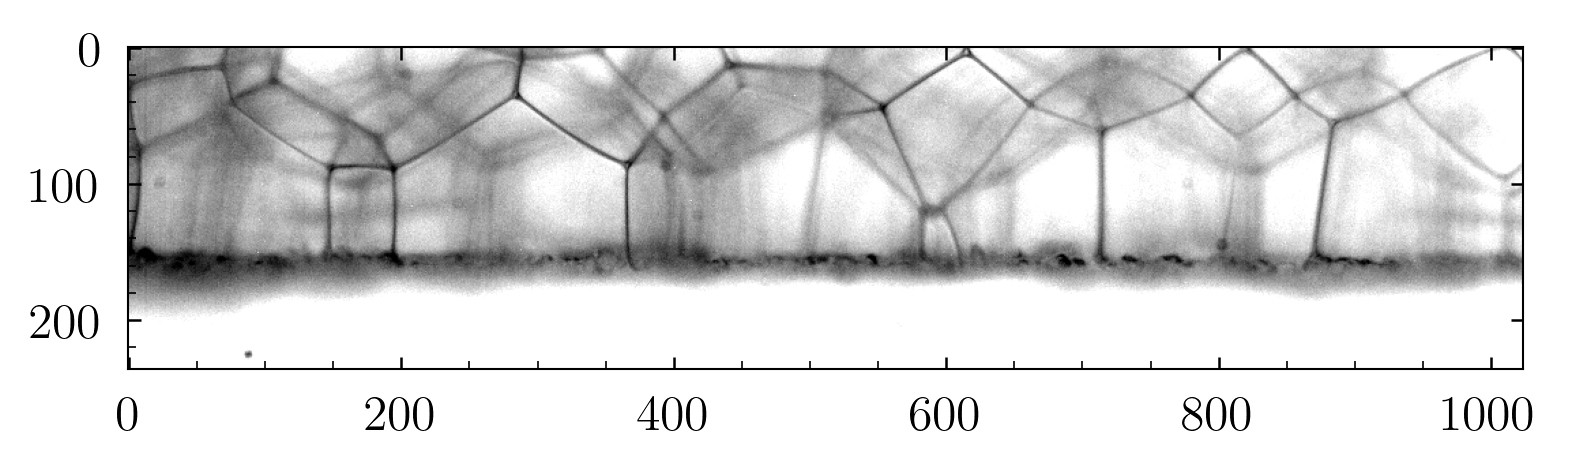

In [20]:
plt.imshow(scaled_img[2], cmap='gray')

# Apply Gaussian blurr

In [45]:
gauss_img = []

for img in scaled_img:
    gauss_img += [filters.gaussian(img, sigma=2)]

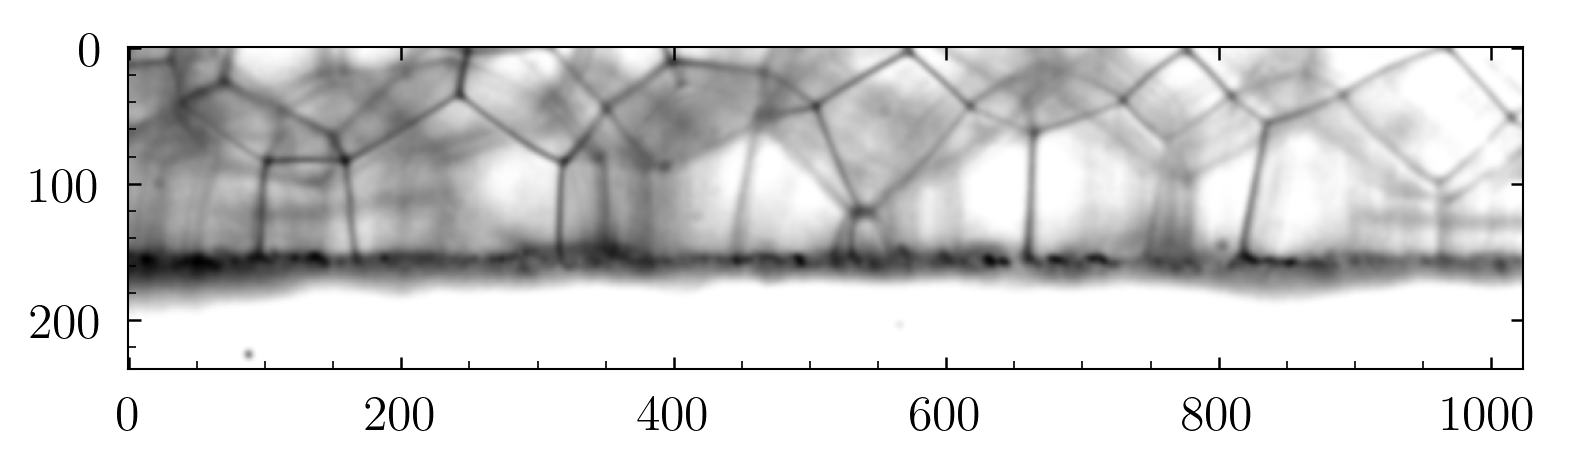

In [46]:
plt.imshow(gauss_img[22], cmap='gray')

# Plot ridges image

In [47]:
def detect_ridges(img, sigma=3.0):
    H_elems = hessian_matrix(img, sigma=sigma, order='rc')
    maxima_ridges, minima_ridges = hessian_matrix_eigvals(H_elems)
    return maxima_ridges

In [48]:
ridge_img = []

for img in gauss_img:
    ridge_img += [detect_ridges(img, sigma=0)] # a bit time consumming this step...



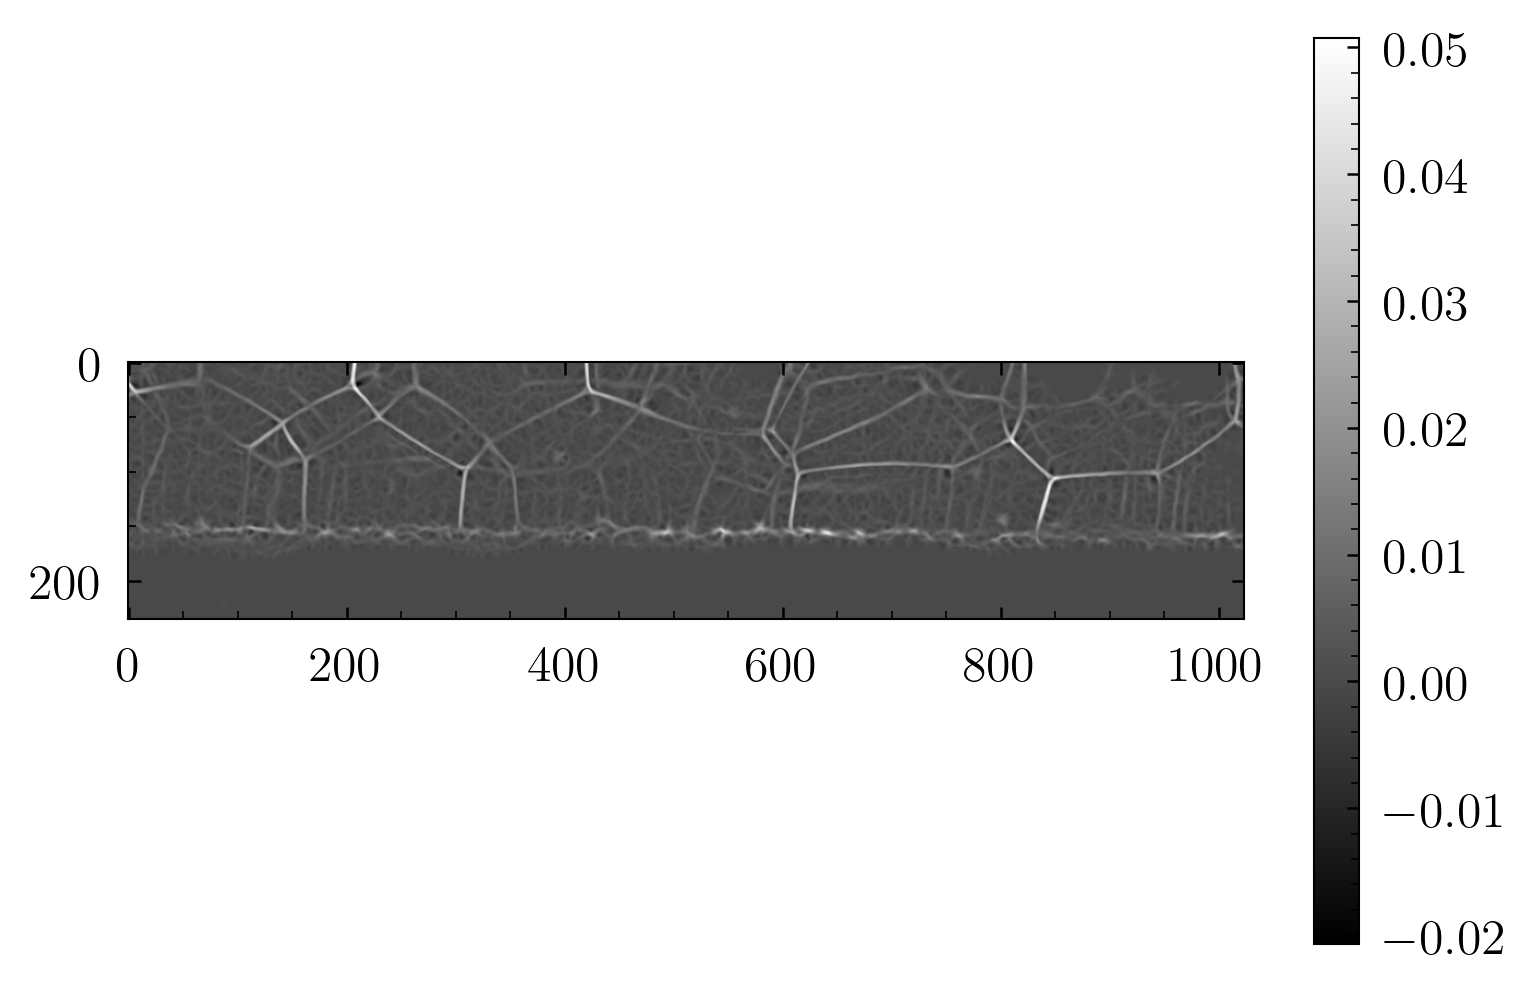

In [51]:
plt.imshow(ridge_img[1000], cmap='gray')
plt.colorbar()

# Scale again

In [53]:
to_export_img = []

for img in ridge_img:
    to_export_img += [(img - img.min()) / (img - img.min()).max()]

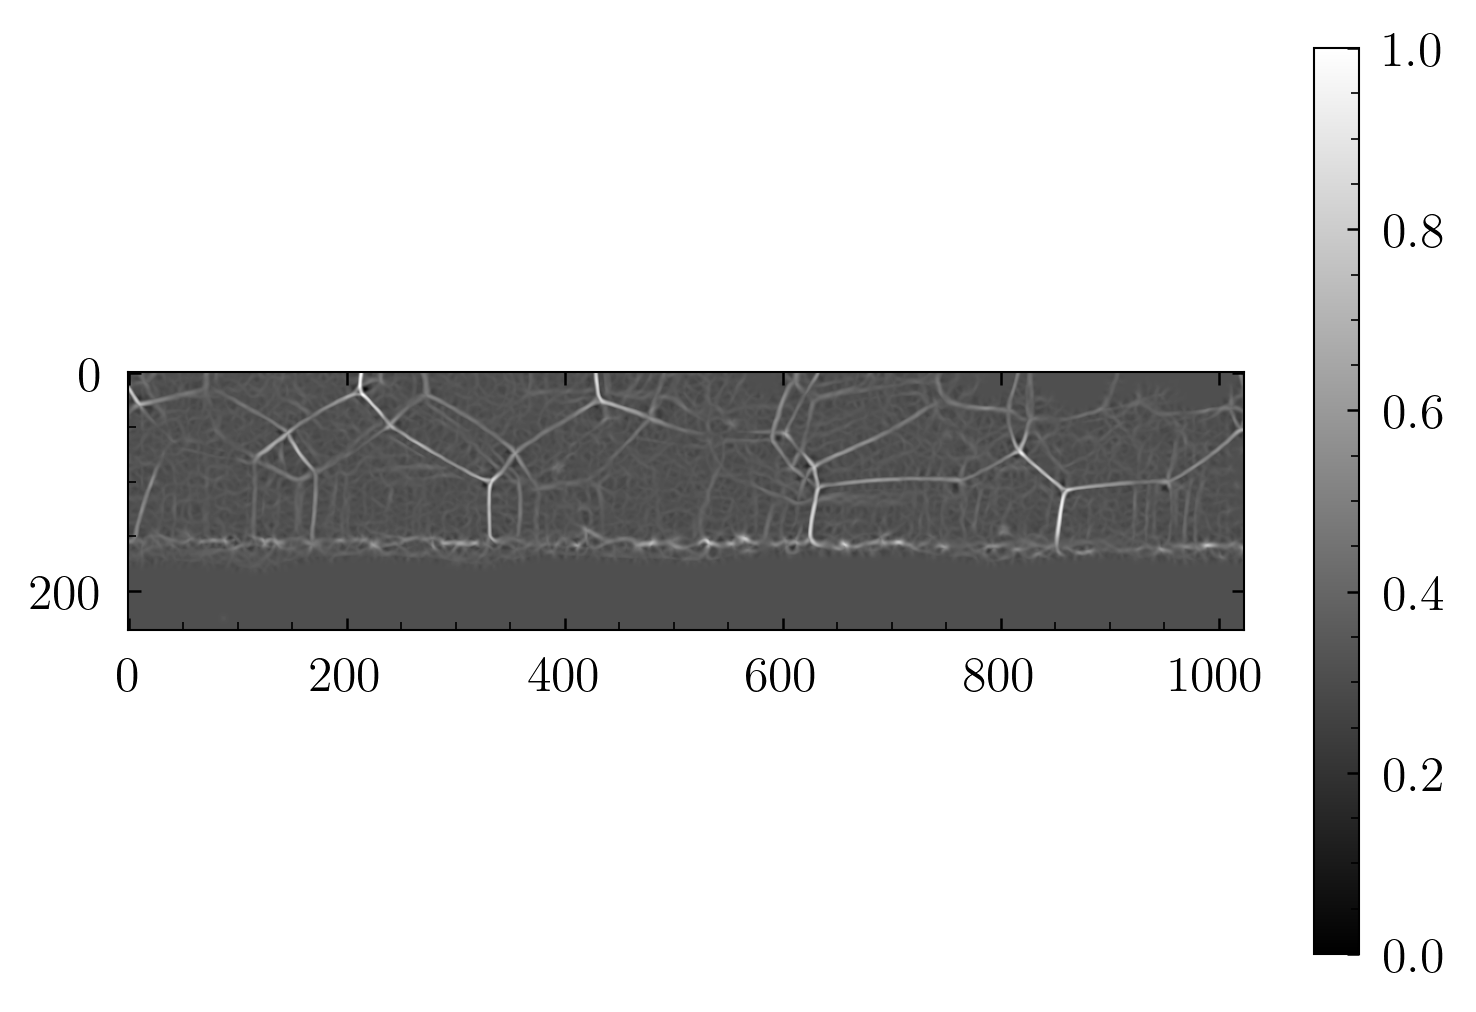

In [54]:
plt.imshow(to_export_img[1005], cmap='gray')
plt.colorbar()

# Export 

In [55]:
folder = './ridges/'

In [64]:
for i, img in enumerate(to_export_img):
    io.imsave(folder + str(i).zfill(5) + '.png', img.astype(np.uint8))    

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0